In [1]:
from sklearn import datasets
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lets load the Diabetes dataset

In [2]:
diabets= datasets.load_diabetes()

In [3]:
print(diabets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X=diabets.data
y=diabets.target
feature_names=diabets.feature_names

In [5]:
print(X.shape, y.shape)

(442, 10) (442,)


In [6]:
df= pd.DataFrame(X,columns=feature_names)
df["progression"]=y

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Train test Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [9]:
print(x_train.shape, y_train.shape)

(309, 10) (309,)


In [10]:
scaler=StandardScaler()

In [11]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [12]:
print(x_train.shape, y_train.shape)

(309, 10) (309,)


Model training

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [14]:
regression.fit(x_train, y_train)

LinearRegression()

In [15]:
print(x_train.shape)
print(y_train.shape)


(309, 10)
(309,)


In [16]:
"""### Si y_train est plus grand, on supprime les lignes en excès
y_train_aligned = y_train[:x_train.shape[0]]

# Vérifier les nouvelles dimensions
print(x_train.shape)  # Devrait être (133, nombre_de_features)
print(y_train_aligned.shape)  # Devrait être (133,) ####"""

'### Si y_train est plus grand, on supprime les lignes en excès\ny_train_aligned = y_train[:x_train.shape[0]]\n\n# Vérifier les nouvelles dimensions\nprint(x_train.shape)  # Devrait être (133, nombre_de_features)\nprint(y_train_aligned.shape)  # Devrait être (133,) ####'

In [17]:
pred=regression.predict(x_test)

In [18]:
pred

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

### Pour s'assurer d'une bonne performance de nos modeles on peut verifier avec la loi normale 

## Assumptions

In [19]:
residuals=y_test-pred
residuals

array([  80.53029969, -111.10052342,   76.65599096,  -62.75977277,
        -12.8830531 ,   -7.89830434,  -15.26463123,   94.23830682,
          9.01450294,  -13.15960992,   -0.4855284 ,   85.86764892,
         41.59257498,   90.86102646,   37.2188158 ,  -64.00472765,
         80.70210028,   11.47092339,  -29.66656381,   55.50014366,
        106.76328683,  -24.00656925,   57.34891541,   45.07766573,
        -26.81266751,  -44.81022205,   71.06864294, -107.72924276,
          1.37079171,   -1.26566599,  -38.14743952,   21.64934995,
        -37.72125745,  -20.04205666,    7.76200103,   43.48451137,
        -79.83265708,  -33.75339206,   26.32049694,    4.42436599,
        -24.55421321,    0.72428895,  -10.15280313,   14.70660016,
        -75.19282154,  -10.95752038,  126.41090551,  -23.05656189,
         35.50276646,   93.11079368,  -16.49472803,   94.1125435 ,
        -42.4354561 ,  -36.34936269,   -8.96973311,  -63.70054112,
        -23.04833555,  -58.68990406,   49.62643481,   -9.69946

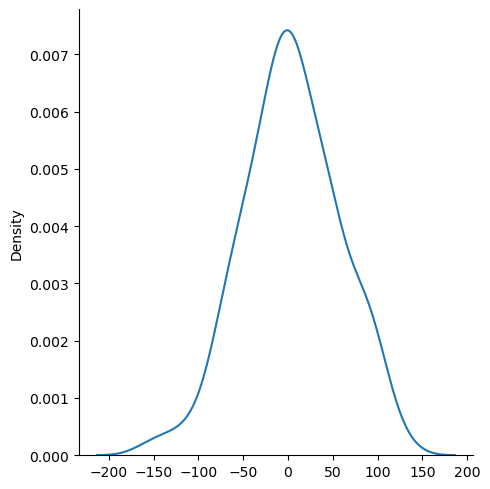

In [20]:
## plot this residuals
sns.displot(residuals, kind='kde')

In [21]:
## Regardons le mean_squad_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

41.91937845679274
2821.750981001311
53.120156070942706


## New Data Prediction

In [23]:
new=diabets.data[0].reshape(1,-1)

In [24]:
new_scaled=scaler.transform(new)

In [25]:
pred_new=regression.predict(new_scaled)

In [26]:
pred_new

array([209.68990406])

## Pickling The Model File For Deployment

In [27]:
import pickle

In [28]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [30]:
pickle.dump(scaler,open('scaling.pkl','wb'))